In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
import seaborn as sns

sns.set(style="whitegrid")

Text(0.5, 1.0, 'Annual Income Distribution')

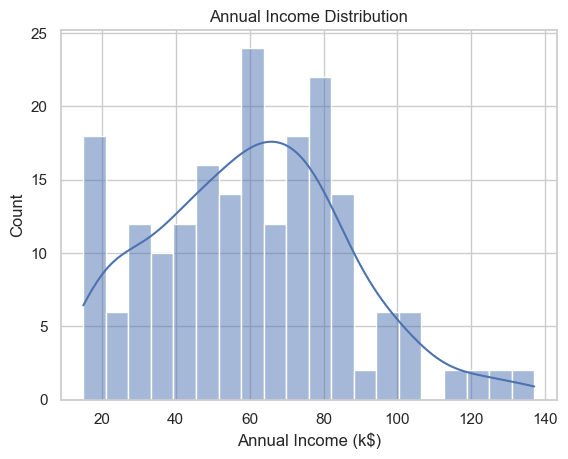

In [6]:
plt.subplot()
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

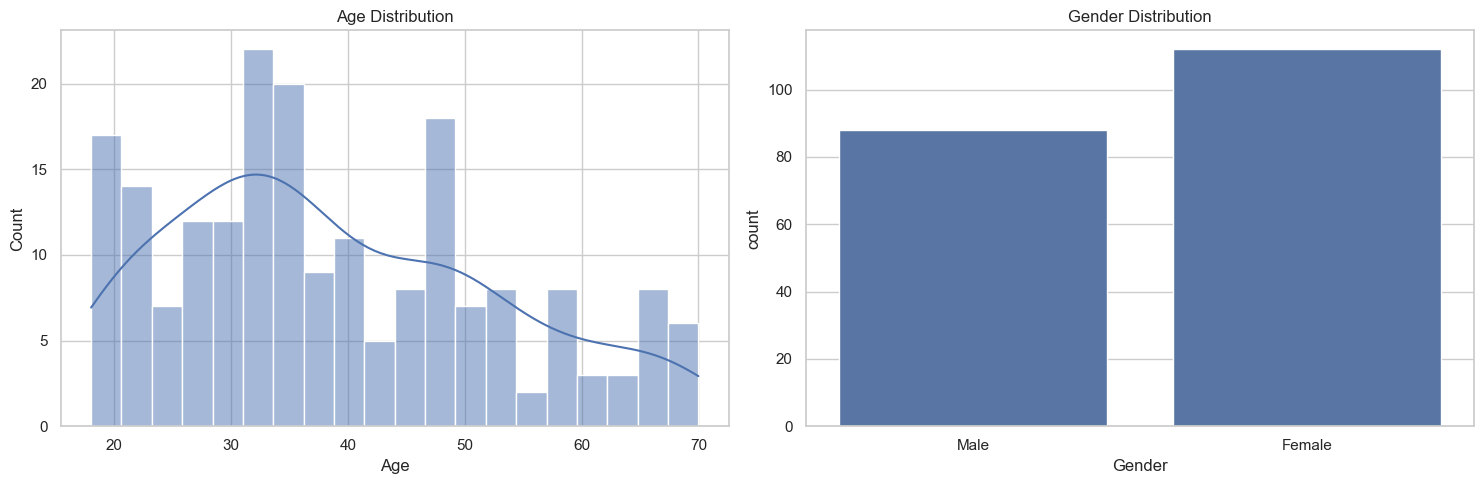

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

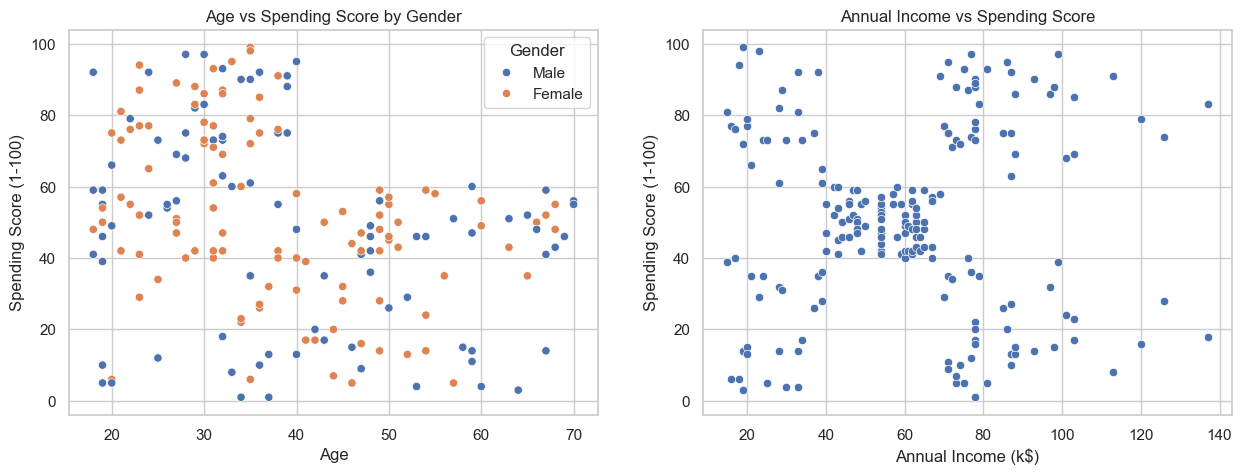

In [8]:
plt.figure(figsize=(15, 5))

# Age vs Spending Score by Gender
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age vs Spending Score by Gender')

# Annual Income vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.show()

In [9]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans

In [11]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

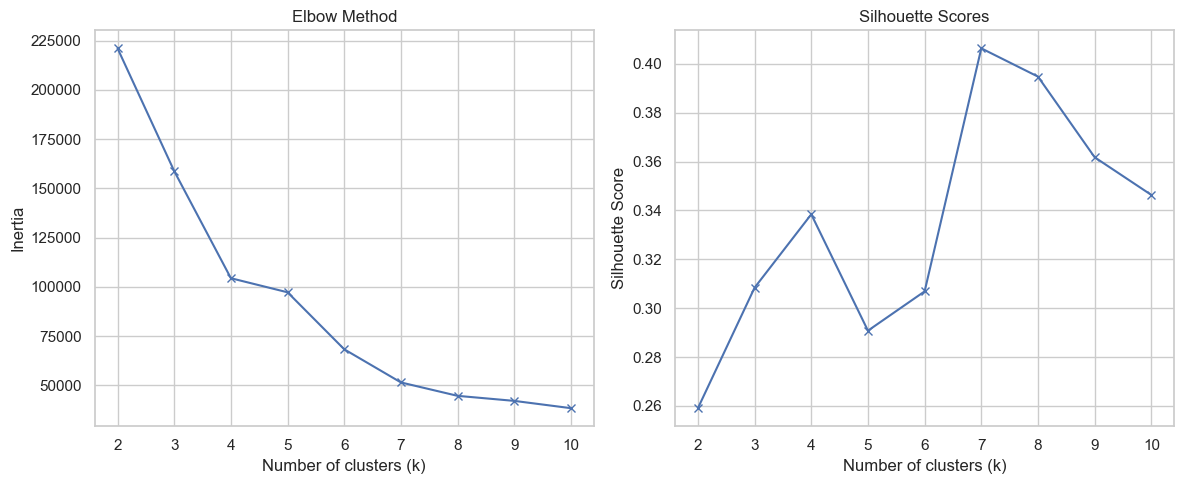

In [18]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()
plt.show()

In [21]:
# Based on the plots, choose optimal k (typically where the elbow bends)
optimal_k = 6  # Adjust based on your plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

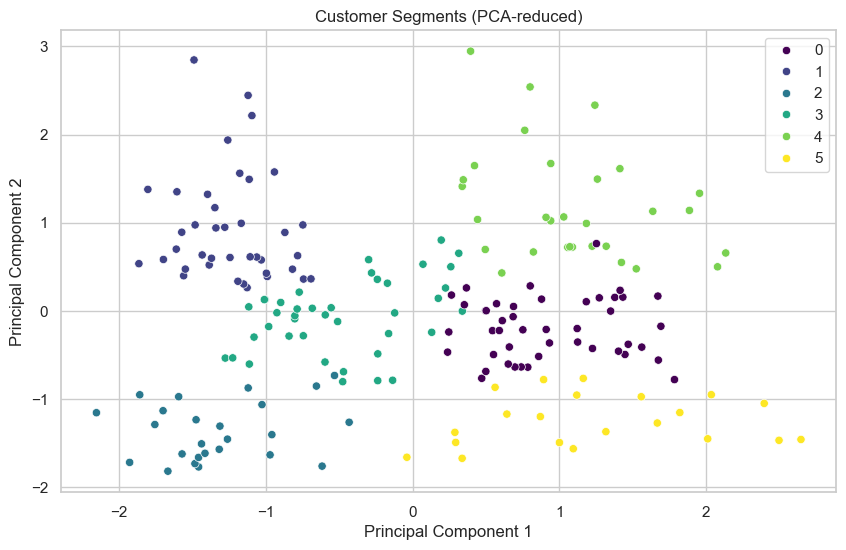

In [22]:
# Optional: Dimensionality reduction with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [23]:
loadings = pca.components_

In [27]:
loadings_df = pd.DataFrame(loadings,columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])


In [28]:
loadings_df

,Age,Annual Income (k$),Spending Score (1-100)
0,0.706382,-0.048024,-0.706199
1,0.030141,0.998832,-0.037775
